In [153]:
#Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # to do the grid of plots

In [154]:
# reading data from csv file
df = pd.read_csv('creditcard.csv')

In [155]:
df.shape

(284807, 31)

In [156]:
df = df[df.Amount < 10000]

In [157]:
# Reason: robust scaler is immune to outliers, as median is chosen as the central tendancy.
from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df = df[['scaled_time','scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Class']]
print('Scaled Data\n')
df.head(10)

Scaled Data



,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994989,1.783399,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994989,-0.269843,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994978,4.984069,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994978,1.418390,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994966,0.670626,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
5,-0.994966,-0.256149,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
6,-0.994942,-0.237703,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
7,-0.994907,0.262717,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
8,-0.994907,0.994969,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
9,-0.994884,-0.256009,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

print("df shape", df.shape)
print("original_Xtrain shape", original_Xtrain.shape)
print("original_ytrain shape", original_ytrain.shape)
print("original_Xtest shape", original_Xtest.shape)
print("original_ytest shape", original_ytest.shape)


df shape (284799, 31)
original_Xtrain shape (227840, 30)
original_ytrain shape (227840,)
original_Xtest shape (56959, 30)
original_ytest shape (56959,)


In [159]:
# Make Dataset

credit_card_4_5 = pd.concat([pd.DataFrame(original_Xtrain), pd.DataFrame(original_ytrain)], axis=1)
credit_card_1_5 = pd.concat([pd.DataFrame(original_Xtest), pd.DataFrame(original_ytest)], axis=1)


In [160]:
credit_card_1_5.to_csv("credit_card_1_5.csv")
credit_card_4_5.to_csv("credit_card_4_5.csv")

In [162]:
print("credit_card_4_5 -> ", credit_card_4_5.shape)
print("credit_card_1_5 -> ", credit_card_1_5.shape)


credit_card_4_5 ->  (227840, 31)
credit_card_1_5 ->  (56959, 31)


In [163]:
df = credit_card_4_5

In [164]:
nonfraud = df[df.Class == 0]
fraud = df[df.Class == 1]

In [165]:
print(fraud.shape)
print(nonfraud.shape)

(394, 31)
(227446, 31)


In [166]:
print('-'*100)
print('-'*100)

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


# GAUSSIAN ANOMALY DETECTION


In [61]:
from scipy.stats import multivariate_normal

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset, mu, sigma):
    p = multivariate_normal(mean = mu, cov = sigma)
    return p.pdf(dataset)


In [62]:
# Epsilon value is the threshold value,
# below which we will mark transaction as Anomalous.

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    farray = []
    Recallarray = []
    Precisionarray = []
    epsilons = (0.0000e+00, 1.0527717316e-70, 1.0527717316e-50, 1.0527717316e-24)
    for epsilon in epsilons:
        predictions = (p_cv < epsilon)
        f = f1_score(train_cv_y, predictions, average = "binary")
        Recall = recall_score(train_cv_y, predictions, average = "binary")
        Precision = precision_score(train_cv_y, predictions, average = "binary")
        farray.append(f)
        Recallarray.append(Recall)
        Precisionarray.append(Precision)
        print ('For below Epsilon')
        print(epsilon)
        print ('F1 score , Recall and Precision are as below')
        print ('Best F1 Score %f' %f)
        print ('Best Recall Score %f' %Recall)
        print ('Best Precision Score %f' %Precision)
        print ('-'*40)
        if f > best_f1:
            best_f1 = f
            best_recall = Recall
            best_precision = Precision
            best_epsilon = epsilon    
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.7, 0.3])
    #plt.subplot(3,1,1)
    plt.plot(farray ,"ro")
    plt.plot(farray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('F1 score vs Epsilon value')
    ax.annotate('Best F1 Score', xy=(best_epsilon,best_f1), xytext=(best_epsilon,best_f1))
    plt.xlabel("Epsilon value") 
    plt.ylabel("F1 Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,2)
    plt.plot(Recallarray ,"ro")
    plt.plot(Recallarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Recall vs Epsilon value')
    ax.annotate('Best Recall Score', xy=(best_epsilon,best_recall), xytext=(best_epsilon,best_recall))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Recall Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,3)
    plt.plot(Precisionarray ,"ro")
    plt.plot(Precisionarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Precision vs Epsilon value')
    ax.annotate('Best Precision Score', xy=(best_epsilon,best_precision), xytext=(best_epsilon,best_precision))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Precision Score") 
    plt.show()
    return best_f1, best_epsilon

In [169]:
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994989,1.783399,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994989,-0.269843,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994978,4.984069,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994978,1.418390,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994966,0.670626,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [170]:
from sklearn.ensemble import RandomForestClassifier

# Feature Importance
# To ease the Problem at hand, we use Feature importance to get rid 
# of unwanted features whose existance will not improve our prediction model. 

# For that, I have used random forest classifier to identify the influential fetures. 

rnd_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rnd_clf.fit(df.iloc[:,2:29],df.iloc[:,30]);


In [171]:
# Visualizing feature importance
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, df.iloc[:,2:29].columns), 
                                     reverse = False)))
trace2 = go.Bar(
    x = x ,
    y = y,
    marker = dict(color=x, colorscale = 'Viridis', reversescale = True),
    name = 'Random Forest Feature importance',
    orientation = 'h',
)

layout = dict(
    title='Barplot of Feature importances',
    width = 600, height = 1000,
    yaxis=dict( showgrid=False, showline=False, showticklabels=True),
    margin=dict(l=300),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [172]:
print("Relatively More Important Features")
for name, importance in zip(df.iloc[:,2:29].columns, rnd_clf.feature_importances_):
    if importance > 0.015 :
        print('"' + name + '"'+',')

Relatively More Important Features
"V3",
"V4",
"V7",
"V9",
"V10",
"V11",
"V12",
"V14",
"V16",
"V17",
"V18",


In [173]:
# Dropping less important features
drop_features = ['V1','V2','V5','V6','V8','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
df.drop(drop_features, axis =1, inplace = True)


In [185]:
df.shape

(227840, 14)

In [187]:
train_strip_v1 = df[df["Class"] == 1]
train_strip_v0 = df[df["Class"] == 0]

In [189]:
Normal_len = len (train_strip_v0)
Anomolous_len = len (train_strip_v1)

start_mid = Anomolous_len // 2
start_midway = start_mid + 1

train_cv_v1  = train_strip_v1 [: start_mid]
train_test_v1 = train_strip_v1 [start_midway:Anomolous_len]

start_mid = (Normal_len * 60) // 100
start_midway = start_mid + 1

cv_mid = (Normal_len * 80) // 100
cv_midway = cv_mid + 1

train_fraud = train_strip_v0 [:start_mid]
train_cv    = train_strip_v0 [start_midway:cv_mid]
train_test  = train_strip_v0 [cv_midway:Normal_len]

train_cv = pd.concat([train_cv,train_cv_v1],axis=0)
train_test = pd.concat([train_test,train_test_v1],axis=0)

train_cv_y = train_cv["Class"]
train_test_y = train_test["Class"]

train_cv.drop(labels = ["Class"], axis = 1, inplace = True)
train_fraud.drop(labels = ["Class"], axis = 1, inplace = True)
train_test.drop(labels = ["Class"], axis = 1, inplace = True)

In [191]:
# Finding Probabilities

mu, sigma = estimateGaussian(train_fraud)
p = multivariateGaussian(train_fraud,mu,sigma)
p_cv = multivariateGaussian(train_cv,mu,sigma)
p_test = multivariateGaussian(train_test,mu,sigma)

For below Epsilon
0.0
F1 score , Recall and Precision are as below
Best F1 Score 0.000000
Best Recall Score 0.000000
Best Precision Score 0.000000
----------------------------------------
For below Epsilon
1.0527717316e-70
F1 score , Recall and Precision are as below
Best F1 Score 0.788462
Best Recall Score 0.832487
Best Precision Score 0.748858
----------------------------------------
For below Epsilon
1.0527717316e-50
F1 score , Recall and Precision are as below
Best F1 Score 0.696538
Best Recall Score 0.868020
Best Precision Score 0.581633
----------------------------------------
For below Epsilon
1.0527717316e-24
F1 score , Recall and Precision are as below
Best F1 Score 0.375000
Best Recall Score 0.883249
Best Precision Score 0.238030
----------------------------------------


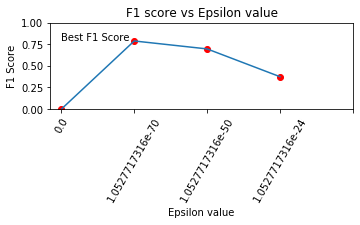

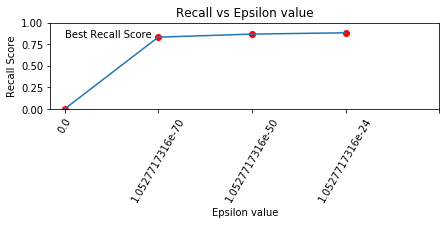

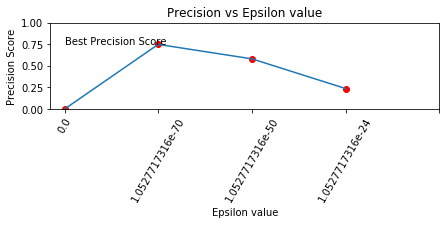

In [192]:
# Performance wrt to Epsilon values

fscore, ep= selectThresholdByCV(p_cv,train_cv_y)

In [197]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve

print("PREDICTIONS ON CROSS-VALIDATION SET\n")
predictions = (p_cv < ep)
Recall = recall_score(train_cv_y, predictions, average = "binary")    
Precision = precision_score(train_cv_y, predictions, average = "binary")
F1score = f1_score(train_cv_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Cross Validation dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

PREDICTIONS ON CROSS-VALIDATION SET

F1 score , Recall and Precision for Cross Validation dataset
Best F1 Score 0.788462
Best Recall Score 0.832487
Best Precision Score 0.748858


In [198]:
print("PREDICTIONS ON TEST SET\n")
predictions = (p_test < ep)
Recall = recall_score(train_test_y, predictions, average = "binary")    
Precision = precision_score(train_test_y, predictions, average = "binary")
F1score = f1_score(train_test_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

PREDICTIONS ON TEST SET

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.723514
Best Recall Score 0.714286
Best Precision Score 0.732984


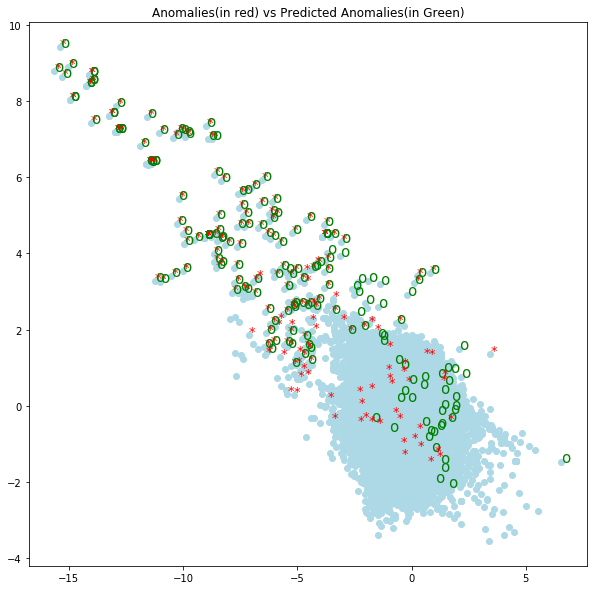

In [195]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_test['V14'],train_test['V11'],marker="o", color="lightBlue")
ax.set_title('Anomalies(in red) vs Predicted Anomalies(in Green)')
for i, txt in enumerate(train_test['V14'].index):
       if train_test_y.loc[txt] == 1 :
            ax.annotate('*', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=13,color='Red')
       if predictions[i] == True :
            ax.annotate('o', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=15,color='Green')

# ISOLATION FOREST 

In [24]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
X_test = credit_card_1_5.drop('Class',axis=1)
y_test = credit_card_1_5['Class']

/Users/nimishagarwal/anaconda3/envs/Data-Science-with-Python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/nimishagarwal/anaconda3/envs/Data-Science-with-Python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[43543 13318]
 [   10    88]]
0.7660071279341281
              precision    recall  f1-score   support

           0       1.00      0.77      0.87     56861
           1       0.01      0.90      0.01        98

    accuracy                           0.77     56959
   macro avg       0.50      0.83      0.44     56959
weighted avg       1.00      0.77      0.87     56959

Total number of Transactions classified as Fraudulent:  13406
Number of Fraudulent Transactions classified as Non-fraudulent:  10 out of 98


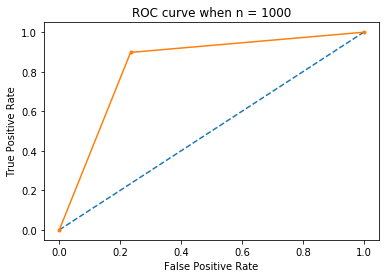

In [26]:
nonfraud_sample = nonfraud.sample(n=1000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()

/Users/nimishagarwal/anaconda3/envs/Data-Science-with-Python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/nimishagarwal/anaconda3/envs/Data-Science-with-Python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[56656   205]
 [   50    48]]
0.9955230955599642
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.19      0.49      0.27        98

    accuracy                           1.00     56959
   macro avg       0.59      0.74      0.64     56959
weighted avg       1.00      1.00      1.00     56959

Total number of Transactions classified as Fraudulent:  253
Number of Fraudulent Transactions classified as Non-fraudulent:  50 out of 98


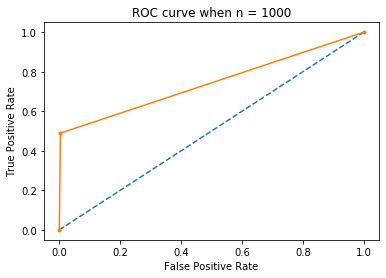

In [27]:
nonfraud_sample = nonfraud.sample(n=45000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()

/Users/nimishagarwal/anaconda3/envs/Data-Science-with-Python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/nimishagarwal/anaconda3/envs/Data-Science-with-Python/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[55076  1785]
 [   29    69]]
0.9681525307677452
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56861
           1       0.04      0.70      0.07        98

    accuracy                           0.97     56959
   macro avg       0.52      0.84      0.53     56959
weighted avg       1.00      0.97      0.98     56959

Total number of Transactions classified as Fraudulent:  1854
Number of Fraudulent Transactions classified as Non-fraudulent:  29 out of 98


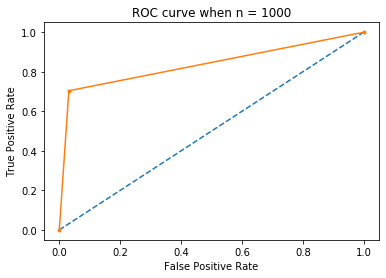

In [28]:
nonfraud_sample = nonfraud.sample(n=5000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")


from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()


In [38]:
y_pred_iso = y_pred

# CLASSIFICATION MODELS

In [29]:
df = pd.read_csv('credit_card_4_5.csv')
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:393]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.to_csv('new_data_4_5_sampled.csv')
new_df.head()

,Unnamed: 0,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
138911,244693,0.796053,0.168250,-20.054939,-22.375260,-3.148811,10.278237,12.511889,-5.078274,-4.482576,...,-5.076221,-2.563489,-0.841853,-7.417014,0.189711,-0.430262,0.396790,-1.374834,4.608702,0
227571,154234,0.190713,-0.293460,-23.984747,16.697832,-22.209875,9.584969,-16.230439,2.596333,-33.239328,...,5.804551,-12.615023,5.774087,2.750221,0.513411,-1.608804,-0.459624,-4.626127,-0.334561,1
227537,102782,-0.191899,-0.033678,1.232604,-0.548931,1.087873,0.894082,-1.433055,-0.356797,-0.717492,...,-0.576274,-0.448671,-0.517568,0.012833,0.699217,0.527258,-0.322607,0.080805,0.035427,1
227820,167305,0.398414,1.172303,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,...,-1.118687,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,1
227816,150679,0.107945,1.146311,-12.833631,7.508790,-20.491952,7.465780,-11.575304,-5.140999,-14.020564,...,-1.378923,2.966842,0.615344,-0.766495,0.431261,-0.104975,-0.010091,-2.400811,-0.720557,1


In [31]:
# Undersampling before cross validating (prone to overfit)
X_train = new_df.drop('Class', axis=1)
y_train = new_df['Class']
dftest = pd.read_csv('credit_card_1_5.csv')
X_test = dftest.drop('Class',axis=1)
y_test = dftest['Class']
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [32]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Classification Report of  LogisiticRegression :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.08      0.87      0.14        98

    accuracy                           0.98     56959
   macro avg       0.54      0.92      0.57     56959
weighted avg       1.00      0.98      0.99     56959

Classifiers:  LogisticRegression Has a training score of 92.0 % accuracy score
Classification Report of  KNearest :
               precision    recall  f1-score   support

           0       1.00      0.63      0.77     56861
           1       0.00      0.64      0.01        98

    accuracy                           0.63     56959
   macro avg       0.50      0.63      0.39     56959
weighted avg       1.00      0.63      0.77     56959

Classifiers:  KNeighborsClassifier Has a training score of 63.0 % accuracy score
Classification Report of  Support Vector Classifier :
               precision    recall  f1-score 

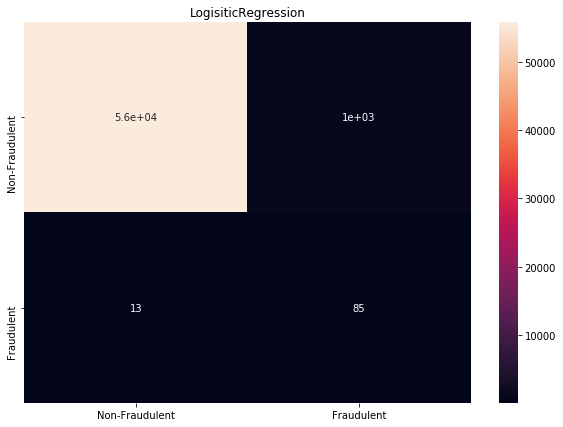

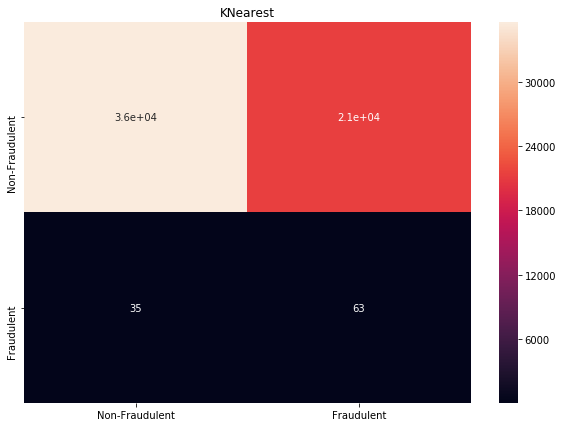

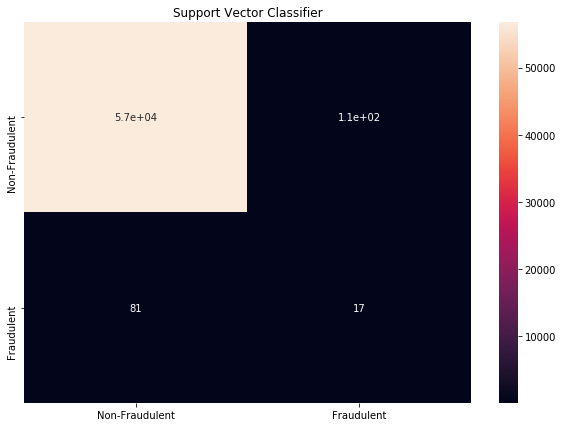

In [33]:

# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC()
}
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
#Let's see how our model performed
from sklearn.metrics import classification_report
classrep = []
confusionmatrices = {}
predicts = {}
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print('Classification Report of ',key,':\n',classification_report(y_test, predictions))
    predicts[key] = predictions
    classrep.append(classification_report(y_test, predictions));
    confusionmatrices[key] = confusion_matrix(y_test,predictions);
    df_cm = pd.DataFrame(confusion_matrix(y_test,predictions), index = [i for i in ['Non-Fraudulent','Fraudulent']],
                  columns = [i for i in ['Non-Fraudulent','Fraudulent']])
    plt.figure(figsize = (10,7))
    plt.title(key)
    sn.heatmap(df_cm, annot=True)
    name = key + 'Confusion Matrix'
    plt.savefig(name)
#     print('The cofusion matrix for',key,':\n',confusion_matrix(y_test,predictions),'\n')
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

In [34]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/Users/nimishagarwal/anaconda3/envs/Data-Science-with-Python/lib/python3.6/site-packages/matplotlib/pyplot.py'>

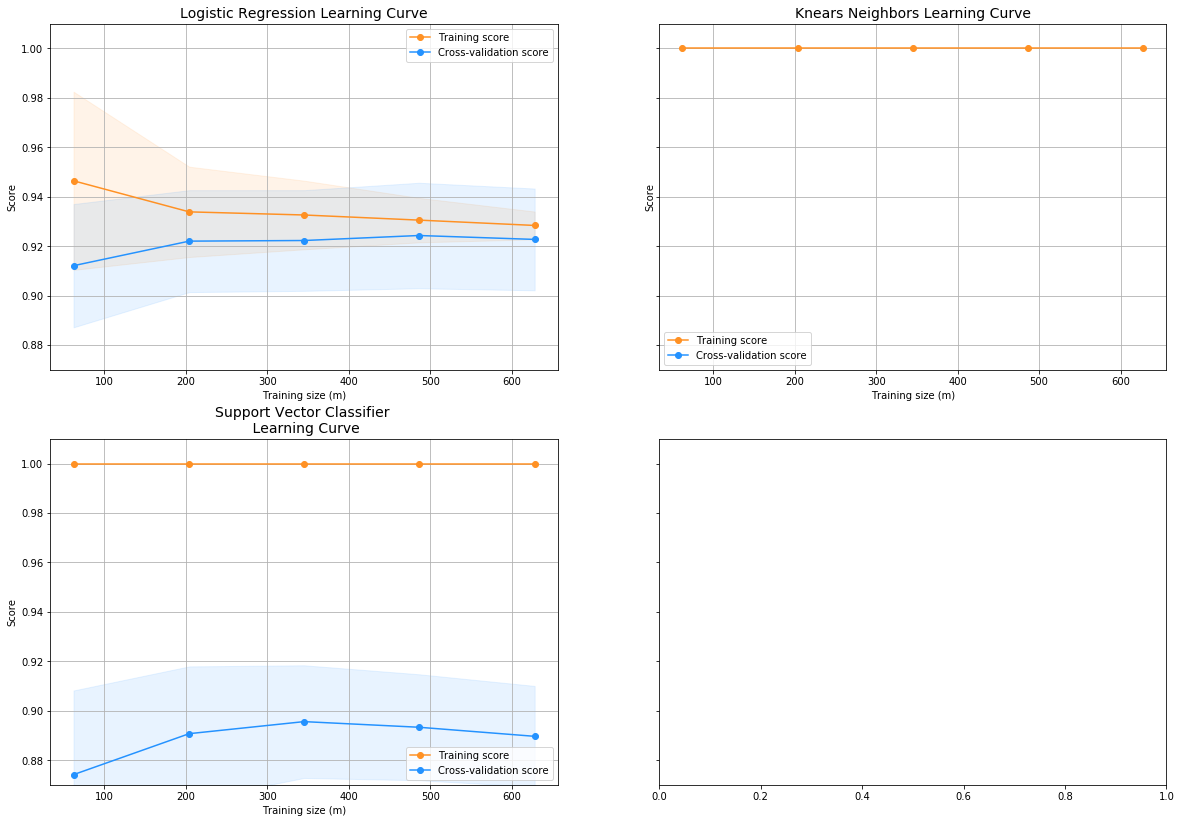

In [35]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(LogisticRegression(),SVC(), DecisionTreeClassifier(),  KNeighborsClassifier(),X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

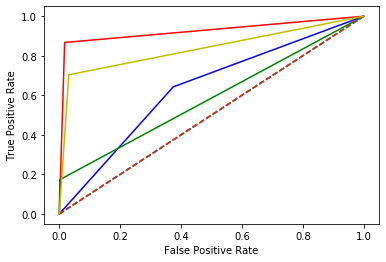

In [39]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
colour={"LogisiticRegression": 'r-',
    "KNearest": 'b-',
    "Support Vector Classifier": 'g-',
       "isolation forest" : 'y-'}
predicts["isolation forest"] = y_pred_iso
classifiers["isolation forest"] = clf
for key, classifier in classifiers.items():
    fpr, tpr, thresholds = roc_curve(y_test, predicts[key])
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr,colour[key],label=key)
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    name = 'ROC curve for '+key
    
#     pyplot.title(name)